## Laboratorium 4 - algorytm Najbliższej Średniej (NM)


### Opis
Celem laboratorium jest implementacja klasyfikatora najbliższej średniej NM (*Nearest Mean*).


### Zadanie

Należy wykonać następujące czynności w celu realizacji niniejszego zadania:
* Wczytaj dane.
* **Zaimplementuj klasyfikator najbliższej średniej (NM) z zastosowaniem odległości Euklidesa**.
* Zaimplementuj funkcję, która zwraca macierz kowariancji (*uwaga: biblioteka `numpy` posiada gotową implementację `cov` z którą możesz porównać wynik*).

    \begin{equation*}
    C = \frac{1}{n - 1} (X - \bar X)(X - \bar X)^T
    \end{equation*}

    gdzie:
    * $X$ to macierz, 
    * $\bar X$ to wektor ze średnimi wartościami cech. 

* **Zaimplementuj klasyfikator najbliższej średniej (NM) z zastosowaniem odległości Machalanobisa**.

    \begin{equation*}
    D_j = \sqrt{ (x - \mu_j)^T S_j^{-1}(x - \mu_j) },
    \end{equation*}

    gdzie:
    * $D_j$ to odległość klasyfikowanej próbki do $j$-tej klasy (grupy, klastra), 
    * $\mu_j$ to wektor ze średnimi wartościami cech w obrębie $j$-tej klasy, 
    * $S_j^{-1}$ to odwrócona macierz kowariancji $j$-tej klasy, 
    * a $x$ to klasyfikowana próbka.

* Opisz wyniki klasyfikatorów i porównaj je z klasyfikatorem *k*NN (porównaj w kontekście różnych metryk - obowiązkowo tablica pomyłek).

> Podpowiedź 1: Do obliczenia macierzy odwrotnej możesz użyć gotową implementację, np. funkcję `linalg.inv` z biblioteki `numpy`.

> Podpowiedź 2: Do wszelkich podstawowych operacji na macierzach (mnożenie, transpozycja, dodawanie, odejmowanie, itp.) możesz zastosować gotową implementację, np. bibliotekę `numpy`.

> UWAGA 1: W niniejszym zadaniu jest dowolność implementacji (nie trzeba trzymać się struktury z poprzedniego zadania), jednak algorytm NM należy zaimplementować samodzielnie bez korzystania z istniających rozwiązań (jak np. z biblioteki `scikit-learn`).

> UWAGA 2: Wszystkie wykonane elementy zadania powinny posiadać stosowne komentarze i opisy.


**Pamiętaj, wyniki powinny być czytelnie opisane oraz zaprezentowane graficznie (jeżeli jest taka możliwość).**

Przykład (na podstawie tablicy pomyłek):

**Źle** (nie wiadomo co jest poniżej zaprezentowane, kolumny ani wiersze nie są podpisane, nie wiadomo które z nich prezentują predykcje, a które właściwe etykiety):
```
array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])
```


<span style="text-decoration:underline">Referencje</span>

1. Mahalanobis, P C, _On test and measures of group divergence : theoretical formulae_, Journal and Proceedings of Asiatic Society of Bengal (New Series) Vol. 26, pp. 541-588. 1930. (URL: http://library.isical.ac.in:8080/xmlui/bitstream/handle/10263/1639/029.pdf)
2. McLachlan, Goeffrey J. _Mahalanobis distance_, Resonance, pp. 20-26. 1999. (URL: https://www.ias.ac.in/article/fulltext/reso/004/06/0020-0026)

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy import stats
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')


with open('dataset.npz', 'rb') as f:
    data = np.load(f)
    train, test = data['train'], data['test']

In [2]:
#obliczanie dystansu
def edist(p1, p2, attributes):
    p1_new = []
    p2_new = []
    distance = 0
    
    for i in attributes:
        p1_new.append(p1[i])
        p2_new.append(p2[i])
    
    for i in range(len(p1_new)):
        distance += (p1_new[i] - p2_new[i])**2
        
    return distance**0.5

In [3]:
def average(lst):
    return sum(lst)/len(lst)

In [4]:
def get_mean(train, leaf_classes):
    leaves_mean =[]
    for c in leaf_classes:
        leafLst = train[train[:,0] == c]
        oneAtribute = leafLst[:, 0]
        avgOneLeaf = []
        for i in range(len(leafLst[0])):
            oneAtribute = leafLst[:, i]
            mean = average(oneAtribute)
            avgOneLeaf.append(mean)
        leaves_mean.append(avgOneLeaf)
    return leaves_mean

In [5]:
def chooseClass(classes):
    for i in range(len(classes)):
        if i == 0:
            new_train = np.array(train[train[:,0] == classes[i]])
            new_test = np.array(test[test[:,0] == classes[i]])
        else:
            new_train = np.vstack((new_train,train[train[:,0] == classes[i]]))
            new_test = np.vstack((new_test,test[test[:,0] == classes[i]]))
    return new_train, new_test

In [6]:
def NM(test, attributes, means):
    classified = np.copy(test)
    for te in range(len(test)):
        nearest = 100
        for i in range(len(means)):
            distance = edist(test[te], means[i], attributes)
            if distance < nearest:
                nearest = distance
                classified[te][0] = means[i][0] 
    return classified

In [7]:
def my_plot(attributes, classes, c_train, c_test):
    plt.rcParams["figure.figsize"] = (10,10)
    plt.figure()
    plt.title("Próbki")
    plt.xlabel(attributes[0])
    plt.ylabel(attributes[1])

    class_name ={1:'Quercus suber',
                 2:'Salix atrocinera',
                 3: 'Populus nigra',
                 4: 'Alnus sp.',
                 5: 'Quercus robur',
                 6:'Crataegus monogyna',
                 7:'Ilex aquifolium',
                 8: 'Nerium oleander',
                 9:'Betula pubescens',
                 10:'Tilia tomentosa',
                 11:'Acer palmatum',
                 12:'Celtis sp.',
                 13:'Corylus avellana',
                 14:'Castanea sativa',
                 15:'Populus alba',
                 16:'Acer negundo',
                 17:'Taxus bacatta',
                 18:'Papaver sp.',
                 19:'Polypolium vulgare',
                 20:'Pinus sp.'
                } 

    for cl in classes:
        random.seed(cl)
        color = (random.randint(0,80)/100,random.randint(0,80)/100,random.randint(0,80)/100)
        plt.scatter(x=c_train[c_train[:,0] == cl][:,attributes[0]],
                    y=c_train[c_train[:,0] == cl][:,attributes[1]],
                    label='Train class: '+class_name[cl],
                    marker = '.',
                    c=color,
                    alpha=0.8
                   )
    
    for cl in classes:
        random.seed(cl)
        color = (random.randint(0,80)/100,random.randint(0,80)/100,random.randint(0,80)/100)
        plt.scatter(x=c_test[c_test[:,0] == cl][:,attributes[0]],
                    y=c_test[c_test[:,0] == cl][:,attributes[1]],
                    label='Pred class: '+class_name[cl],
                    marker='o',
                    c=color,
                    alpha=0.2
                    )
        
    plt.legend()
    plt.show()

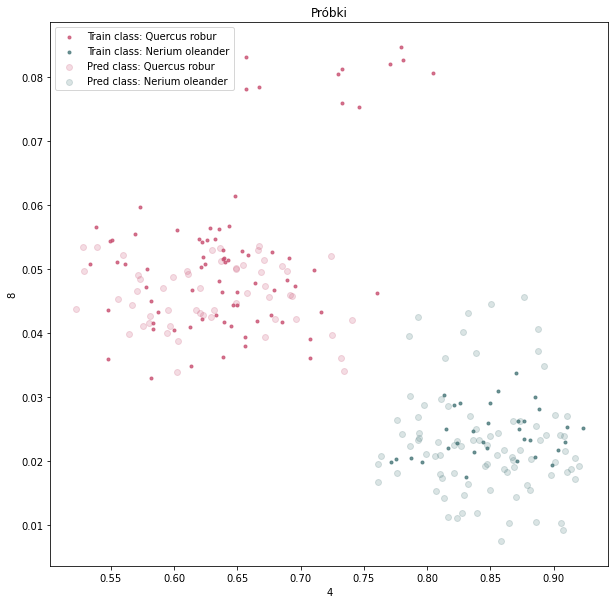

In [8]:
attributes = [4,8]
leaf_classes = [5,8]
train_new, test_new = chooseClass(leaf_classes)
means = get_mean(train_new, leaf_classes)
classified = NM(test_new,attributes,means)
my_plot(attributes, leaf_classes, train_new, classified)

Accuracy: 1.0
Balanced accuracy: 1.0
Precision score: 1.0


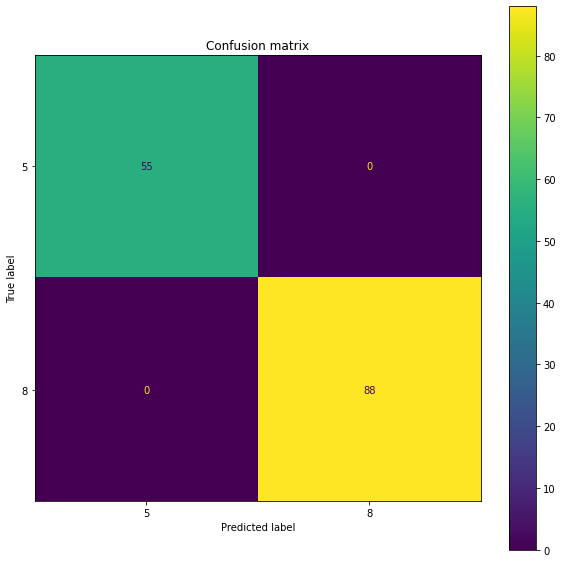

In [9]:
cm = metrics.confusion_matrix(test_new[:,0], classified[:,0],labels=leaf_classes)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=leaf_classes)
disp.plot()
plt.title('Confusion matrix')

acc = metrics.accuracy_score(test_new[:,0], classified[:,0])
bacc = metrics.balanced_accuracy_score(test_new[:,0], classified[:,0])
ps = metrics.precision_score(test_new[:,0], classified[:,0], average='micro')

# ACC = (TP+TN)/(P+N) => jest to wskaźnik, który informuje nas o poprawności klasyfikatora ile poprawnie pozytywnych próbek do całkowitej ilości próbek
print('Accuracy:',acc)
# BACC = (Sensitivity+Specificity)/2 => wykorzystuje się go głownie przy danych niezbalansowanych gdy jedna klasa występuje częściej niż pozostąłe
print('Balanced accuracy:',bacc)
# Precision = TP/(TP + FP) => liczy tylko ilość poprawnie sklasyfikowanych pozytywów
print('Precision score:',ps)

# Machalanobisa

In [10]:
def my_cov(arr):
    return (1/(len(arr)-1))*(arr-arr.mean(axis=0)).T@(arr-arr.mean(axis=0))

In [11]:
def m_dist(x, arr,features):
    return np.sqrt(
    (x[features]-arr[:,features].mean(axis=0)).T @ 
    np.linalg.pinv(my_cov(class4_tr[:,features])) @
    (x[features]-arr[:,features].mean(axis=0))
)

In [12]:
def nM_mach(train, test, features, classes):
    classified = np.copy(test)
    for te in range(len(test)):

        nearest = 100
        for tr in range(len(classes)):
            trcl  = np.array(train[train[:,0] == classes[tr]])
            distance = m_dist(test[te],trcl, features)
            if distance < nearest:
                nearest = distance

                classified[te,0] = trcl[0][0]
    
    return classified

In [13]:
leaf_classes = [5,8]
class4_tr, class4_te = chooseClass(leaf_classes)

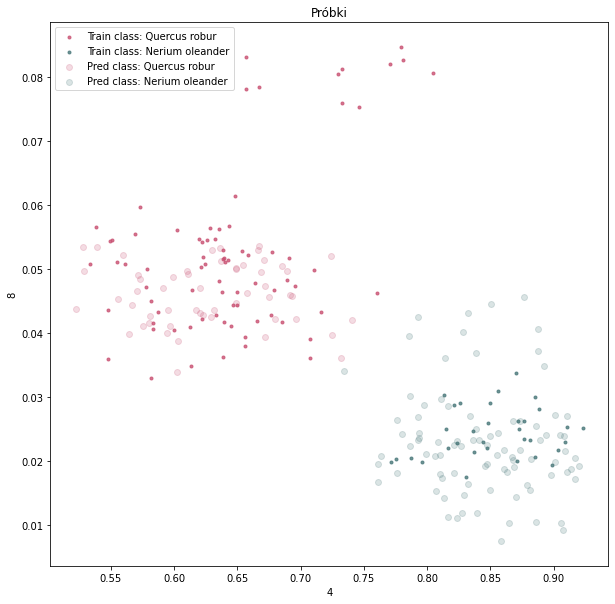

In [14]:
attributes = [4,8]
leaf_classes = [5,8]

# tworzenie podzbiorów dla wybranych klas
new_train, new_test = chooseClass(leaf_classes)

classified = nM_mach(new_train, new_test, attributes, leaf_classes)
my_plot(attributes, leaf_classes, train_new, classified)

Accuracy: 0.993006993006993
Balanced accuracy: 0.990909090909091
Precision score: 0.993006993006993


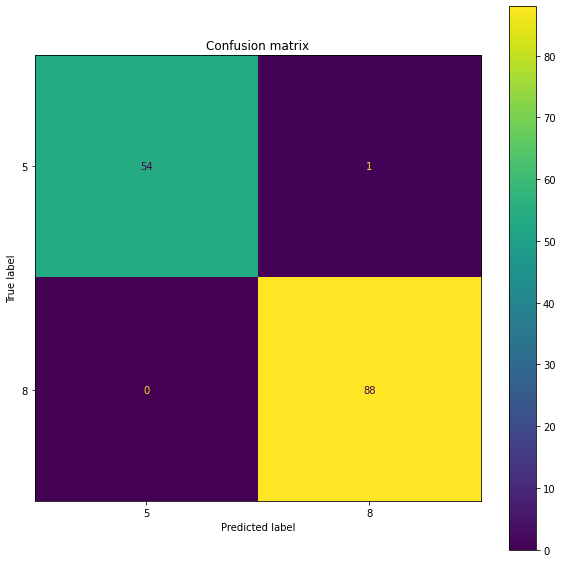

In [15]:
cm = metrics.confusion_matrix(test_new[:,0], classified[:,0],labels=leaf_classes)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=leaf_classes)
disp.plot()
plt.title('Confusion matrix')

acc = metrics.accuracy_score(test_new[:,0], classified[:,0])
bacc = metrics.balanced_accuracy_score(test_new[:,0], classified[:,0])
ps = metrics.precision_score(test_new[:,0], classified[:,0], average='micro')

# ACC = (TP+TN)/(P+N) => jest to wskaźnik, który informuje nas o poprawności klasyfikatora ile poprawnie pozytywnych próbek do całkowitej ilości próbek
print('Accuracy:',acc)
# BACC = (Sensitivity+Specificity)/2 => wykorzystuje się go głownie przy danych niezbalansowanych gdy jedna klasa występuje częściej niż pozostąłe
print('Balanced accuracy:',bacc)
# Precision = TP/(TP + FP) => liczy tylko ilość poprawnie sklasyfikowanych pozytywów
print('Precision score:',ps)

# Porównanie

In [16]:
def kNN(train, test, attributes, n):
    classified = np.copy(test)
    for te in range(test.shape[0]):
        distances = np.full((train.shape[0], 2),100.)
        for tr in range(train.shape[0]):
            dist = edist(test[te], train[tr], attributes)
            distances[tr,0] = dist
            distances[tr,1] = train[tr,0]
        distances = distances[distances[:,0].argsort()]
        x = stats.mode(distances[0:n,1])
        classified[te,0] = x[0][0]
            
    return classified

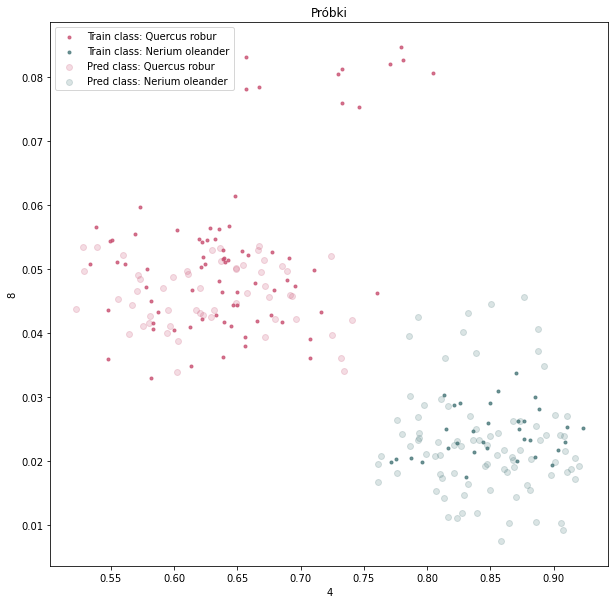

In [17]:
matplotlib_axes_logger.setLevel('ERROR')
# atrybut
attributes = [4,8]
# listek
leaf_classes = [5,8]
# "zasieg poszukiwań"
k=3
#tworzenie podzbiorów dla listków
train,test = chooseClass(leaf_classes)
#klasyfikacja zbioru testowego na podstawie treningowego
knn = kNN(train,test,attributes, k)
#Wyświetlenie wyników
my_plot(attributes, leaf_classes, train, knn)

Accuracy: 1.0
Balanced accuracy: 1.0
Precision score: 1.0


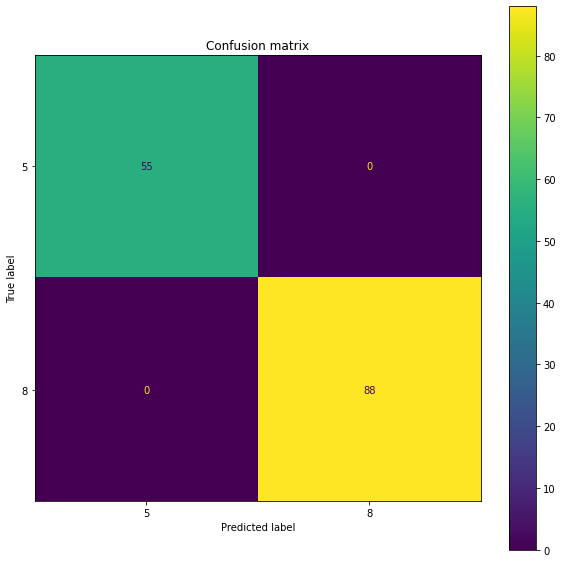

In [18]:
cm = metrics.confusion_matrix(test[:,0], knn[:,0],labels=leaf_classes)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=leaf_classes)
disp.plot()
plt.title('Confusion matrix')

acc = metrics.accuracy_score(test[:,0], knn[:,0])
bacc = metrics.balanced_accuracy_score(test[:,0], knn[:,0])
ps = metrics.precision_score(test[:,0], knn[:,0], average='micro')

# ACC = (TP+TN)/(P+N) => jest to wskaźnik, który informuje nas o poprawności klasyfikatora ile poprawnie pozytywnych próbek do całkowitej ilości próbek
print('Accuracy:',acc)
# BACC = (Sensitivity+Specificity)/2 => wykorzystuje się go głownie przy danych niezbalansowanych gdy jedna klasa występuje częściej niż pozostąłe
print('Balanced accuracy:',bacc)
# Precision = TP/(TP + FP) => liczy tylko ilość poprawnie sklasyfikowanych pozytywów
print('Precision score:',ps)